# effect of the number of rooms on the price

In [1]:
import os
import warnings
import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

col_names =  ["Locality",     
              "Type_of_property",
              "Subtype_of_property",
              "Price",
              "Type_of_sale",
              "Number_of_rooms",
              "Living_Area",
              "Fully_equipped_kitchen",
              "Furnished",
              "Open_fire",
              "Terrace",
              "Terrace_Area",
              "Garden",
              "Garden_Area",
              "Surface_area_of_the_plot_of_land",
              "Number_of_facades",
              "Swimming_pool",
              "State_of_the_building"
              ]

file_path = r"C:\Users\Sacha\Documents\BeCode\real-estate-price-prediction\data_analysis\main_csv.csv" 
df_final = pd.read_csv(file_path)
df_final = df_final.dropna(subset=['Number_of_rooms'])

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


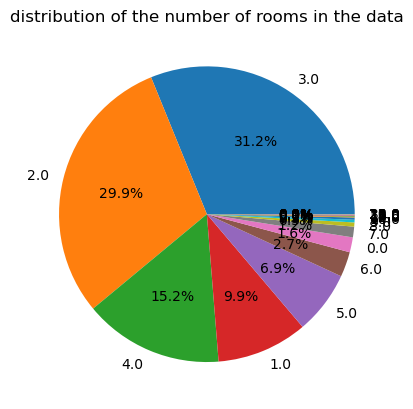

In [2]:
freq_type = df_final["Number_of_rooms"].value_counts()
plt.pie(freq_type, labels=freq_type.index, autopct='%1.1f%%')
plt.title("distribution of the number of rooms in the data")
plt.show()

In [3]:
print(df_final.groupby("Number_of_rooms")["Price"].median())

Number_of_rooms
0.0      215000.0
1.0      210000.0
2.0      275000.0
3.0      349000.0
4.0      399000.0
5.0      530000.0
6.0      635000.0
7.0      847500.0
8.0      750000.0
9.0      665000.0
10.0     799000.0
11.0    1322500.0
12.0    1295000.0
13.0    2250000.0
14.0    1567500.0
15.0    1372500.0
16.0     549000.0
17.0    1105000.0
19.0    1950000.0
20.0    2825000.0
22.0    3390000.0
25.0    1960000.0
32.0      42000.0
Name: Price, dtype: float64


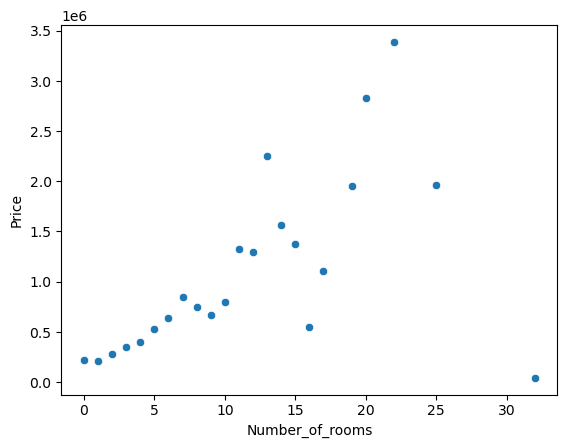

In [4]:
median_price_by_rooms = df_final.groupby("Number_of_rooms")["Price"].median().reset_index()

# Create the scatter plot
sns.scatterplot(x="Number_of_rooms", y="Price", data=median_price_by_rooms)
plt.show()

It follows an interresting courb for number_of_rooms<=7

# just for test

<Figure size 1000x500 with 0 Axes>

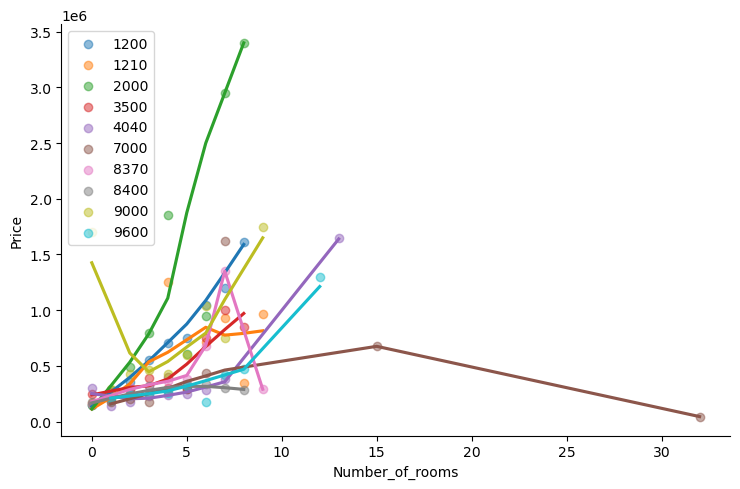

In [5]:
groupby_loc = df_final.groupby(["Locality", "Number_of_rooms"])["Price"].median().reset_index()

# Filter the dataframe to include only the first 10 localities
top_10_localities = groupby_loc['Locality'].value_counts().sort_values(ascending=False).index[20:30]
groupby_loc = groupby_loc[groupby_loc['Locality'].isin(top_10_localities)]

# Increase the size of the plot
plt.figure(figsize=(10,5))

# set the marker for each hue level
"""
my_markers = ['o','s','D','^','+','v','<','>','*','p']
for i, marker in enumerate(my_markers):
    plt.scatter([],[], marker=marker, color='black', label=groupby_loc['Locality'].unique()[i])
"""

# Create the scatter plot
sns.lmplot(x="Number_of_rooms", y="Price", hue="Locality", data=groupby_loc,lowess=True,  scatter_kws={'alpha':0.5}, aspect=1.5, legend=False)
plt.legend(loc='upper left')
plt.show()

It looks like after 7 rooms it could be interesting to delete data, let's see how much house/appartment there are after 7 rooms:

In [6]:
print(sum(df_final["Number_of_rooms"]>7))

224
